<a href="https://colab.research.google.com/github/MSRajawat0852/Speech-Emotion-Recommendation/blob/main/Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import IPython as ipd
import librosa
import librosa.display
from IPython.display import Audio
import os

import warnings
warnings.filterwarnings("ignore")

In [74]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/dataverse_files'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/dataverse_files/OAF_take_angry.wav
/content/drive/MyDrive/dataverse_files/YAF_laud_neutral.wav
/content/drive/MyDrive/dataverse_files/YAF_numb_angry.wav
/content/drive/MyDrive/dataverse_files/YAF_seize_angry.wav
/content/drive/MyDrive/dataverse_files/OAF_voice_disgust.wav
/content/drive/MyDrive/dataverse_files/YAF_cause_fear.wav
/content/drive/MyDrive/dataverse_files/YAF_rag_disgust.wav
/content/drive/MyDrive/dataverse_files/YAF_hall_fear.wav
/content/drive/MyDrive/dataverse_files/YAF_date_disgust.wav
/content/drive/MyDrive/dataverse_files/OAF_ripe_disgust.wav
/content/drive/MyDrive/dataverse_files/OAF_mouse_sad.wav
/content/drive/MyDrive/dataverse_files/YAF_dog_neutral.wav
/content/drive/MyDrive/dataverse_files/OAF_gaze_sad.wav
/content/drive/MyDrive/dataverse_files/OAF_hire_angry.wav
/content/drive/MyDrive/dataverse_files/OAF_neat_sad.wav
/content/drive/MyDrive/dataverse_files/YAF_gin_happy.wav
/content/drive/MyDrive/dataverse_files/YAF_sub_neutral.wav
/content

In [76]:
path = []
labels = []
for dirname , _ , filenames in os.walk('/content/drive/MyDrive/dataverse_files'):
  for filename in filenames:
    path.append(os.path.join(dirname, filename))
    label = filename.split('_')[-1]
    label = label.split('.')[0]
    labels.append(label.lower())

In [77]:
df = pd.DataFrame()
df['speech'] = path
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/dataverse_files/OAF_tak...,angry
1,/content/drive/MyDrive/dataverse_files/YAF_lau...,neutral
2,/content/drive/MyDrive/dataverse_files/YAF_num...,angry
3,/content/drive/MyDrive/dataverse_files/YAF_sei...,angry
4,/content/drive/MyDrive/dataverse_files/OAF_voi...,disgust


In [78]:
df.shape

(2800, 2)

In [79]:
df['label'].value_counts()

,count
label,
angry,400
neutral,400
disgust,400
fear,400
sad,400
happy,400
ps,400


In [80]:
df.shape

(2800, 2)

In [81]:
def waveshow(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

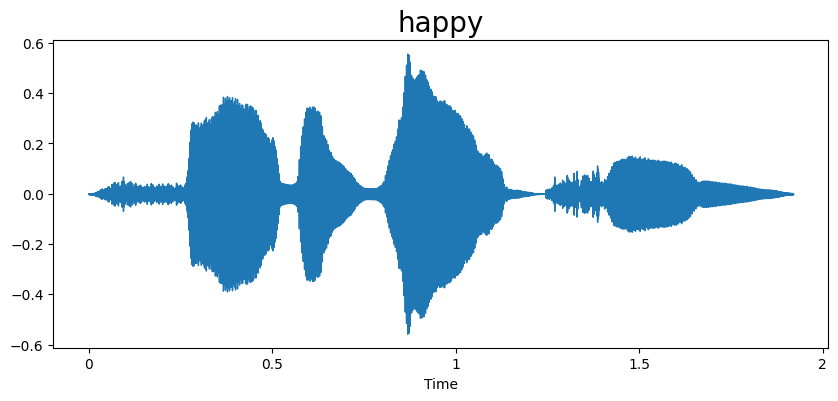

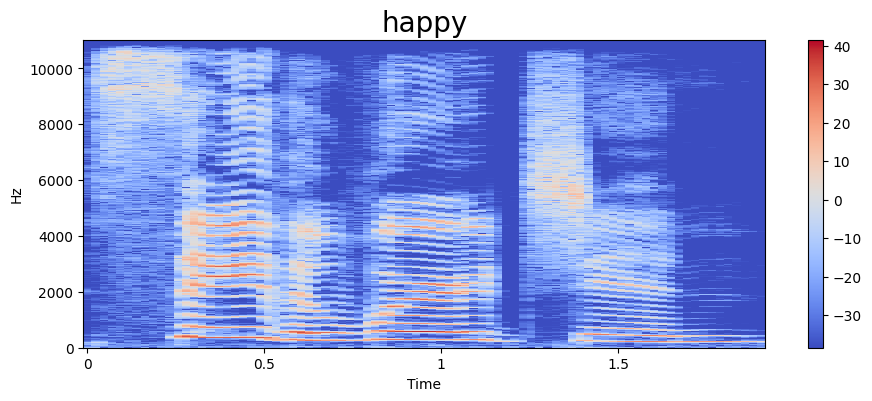

In [82]:
# Select an emotion
emotion = 'happy'

# Load the audio file
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)

# Display the waveform and spectrogram
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

# Play the audio file
Audio(path)

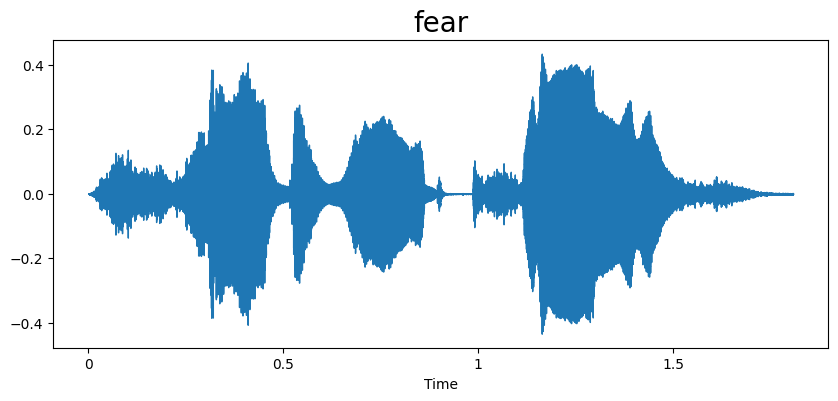

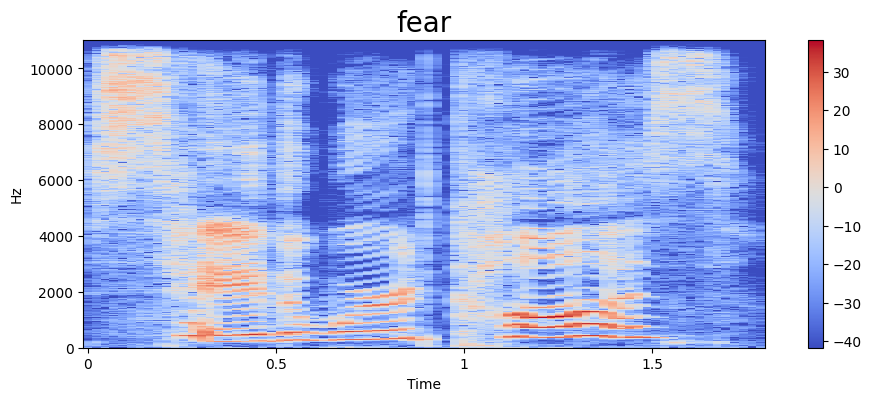

In [83]:
# Select an emotion
emotion = 'fear'

# Load the audio file
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)

# Display the waveform and spectrogram
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

# Play the audio file
Audio(path)

<Axes: xlabel='count', ylabel='label'>

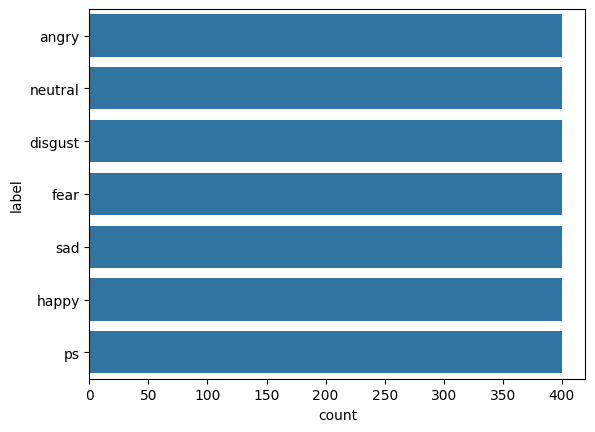

In [84]:
import seaborn as sns

sns.countplot(df['label'])

In [85]:
def extract(filename):
  y , sr  = librosa.load(filename, duration = 3, offset = .5)
  mfcc = np.mean(librosa.feature.mfcc(y = y , sr = sr, n_mfcc = 40), axis = 1)
  return mfcc

In [86]:
a = extract(df['speech'][0])
a

array([-4.14759949e+02,  6.17903595e+01, -4.12146616e+00,  1.18356965e-01,
        9.89977551e+00, -3.43931031e+00, -2.33378429e+01,  9.72377121e-01,
       -1.08081388e+01, -2.75688720e+00, -9.91828346e+00,  3.29180980e+00,
       -1.55437303e+00,  5.14513302e+00, -1.90632343e+00,  1.34813821e+00,
        9.23775196e-01, -3.51391387e+00, -3.19599485e+00, -1.16044092e+01,
       -4.46811247e+00,  4.56385088e+00,  5.70240355e+00,  2.46534977e+01,
        2.46030064e+01,  2.30147648e+01,  8.21153545e+00,  6.57622623e+00,
       -1.65414560e+00,  7.48564434e+00,  8.94865894e+00,  6.12802982e+00,
        4.50469208e+00, -3.34204578e+00,  1.28416348e+00,  4.46811056e+00,
        2.01052213e+00,  1.11858869e+00, -4.00641394e+00, -4.52305973e-02],
      dtype=float32)

In [87]:
a_mfcc = df['speech'].apply(lambda x: extract(x))
a_mfcc

,speech
0,"[-414.75995, 61.79036, -4.121466, 0.118356965,..."
1,"[-461.26126, 117.711075, 23.995747, 17.071974,..."
2,"[-316.1863, 70.20299, -9.841363, 16.624695, -1..."
3,"[-387.82196, 21.266785, 17.253712, 21.870646, ..."
4,"[-470.54465, 88.24481, 26.05667, 0.7661055, 12..."
...,...
2795,"[-438.84384, 91.219315, 38.050423, -3.11005, -..."
2796,"[-335.85297, 44.492435, -14.665875, 18.491714,..."
2797,"[-413.25497, 76.98526, 33.61119, 25.005022, 8...."
2798,"[-493.13364, 93.54315, 19.678148, 4.0556016, -..."


In [ ]:
#import os

#def is_audio_file(file_path):
 #   return file_path.lower().endswith(('.wav', '.mp3', '.flac', '.ogg'))  # Add other extensions as needed

#a_mfcc = df['speech'].apply(lambda x: extract(x) if is_audio_file(x) else None)
#a_mfcc

,speech
0,"[-414.75995, 61.79036, -4.121466, 0.118356965,..."
1,"[-461.26126, 117.711075, 23.995747, 17.071974,..."
2,"[-316.1863, 70.20299, -9.841363, 16.624695, -1..."
3,"[-387.82196, 21.266785, 17.253712, 21.870646, ..."
4,"[-470.54465, 88.24481, 26.05667, 0.7661055, 12..."
...,...
2796,"[-438.84384, 91.219315, 38.050423, -3.11005, -..."
2797,"[-335.85297, 44.492435, -14.665875, 18.491714,..."
2798,"[-413.25497, 76.98526, 33.61119, 25.005022, 8...."
2799,"[-493.13364, 93.54315, 19.678148, 4.0556016, -..."


In [ ]:
#from keras.preprocessing.sequence import pad_sequences
#lengths = [len(x) for x in a_mfcc if x is not None]
#avg_length = int(np.mean(lengths))  # or use max(lengths)
#desired_length = avg_length  # or set to max_length based on your preference

# Apply padding/truncation using desired_length
#x_padded = pad_sequences([x for x in a_mfcc if x is not None], dtype='float32', padding='post', maxlen=desired_length, truncating='post')

In [88]:
x = [x for x in a_mfcc]
x = np.array(x)
x = np.expand_dims(x, -1)
x.shape

(2800, 40, 1)

In [89]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM, Bidirectional, Input, concatenate
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, LSTM

In [90]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [91]:
enc.get_feature_names_out()

array(['label_angry', 'label_disgust', 'label_fear', 'label_happy',
       'label_neutral', 'label_ps', 'label_sad'], dtype=object)

In [92]:
y = y.toarray()

In [93]:
y.shape

(2800, 7)

In [94]:
#define LSTM model
model = Sequential([

      LSTM(256, return_sequences= False , input_shape= (40,1) ),
      Dropout(.2),
      Dense(128, activation = 'relu'),
      Dropout(.1),
      Dense(64, activation = 'relu'),
      Dropout(.1),
      Dense(7 , activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [95]:
# Define CNN model
model1 = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(40,1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)                    │ (None, 38, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 19, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 17, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 8, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,711 (315.28 KB)

 Trainable params: 80,711 (315.28 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
from keras.layers import SimpleRNN
# Define RNN model

model2 = Sequential([
    SimpleRNN(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 256)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 107,655 (420.53 KB)

 Trainable params: 107,655 (420.53 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
history = model.fit(x,y,validation_split = 0.2,epochs = 5,batch_size = 64)

Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 211ms/step - accuracy: 0.3978 - loss: 1.4824 - val_accuracy: 0.7732 - val_loss: 0.5379
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 234ms/step - accuracy: 0.8082 - loss: 0.4714 - val_accuracy: 0.8125 - val_loss: 0.4686
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 175ms/step - accuracy: 0.8856 - loss: 0.3405 - val_accuracy: 0.9214 - val_loss: 0.2759
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 192ms/step - accuracy: 0.9433 - loss: 0.1797 - val_accuracy: 0.9393 - val_loss: 0.2044
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 238ms/step - accuracy: 0.9571 - loss: 0.1433 - val_accuracy: 0.9464 - val_loss: 0.1667


In [97]:
history1 = model1.fit(x,y,validation_split = 0.2,epochs = 5,batch_size = 64)

Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.3115 - loss: 3.6048 - val_accuracy: 0.8500 - val_loss: 0.5736
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8006 - loss: 0.5716 - val_accuracy: 0.9429 - val_loss: 0.1926
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9152 - loss: 0.2489 - val_accuracy: 0.9589 - val_loss: 0.1203
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9494 - loss: 0.1654 - val_accuracy: 0.9732 - val_loss: 0.0878
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9731 - loss: 0.0879 - val_accuracy: 0.9804 - val_loss: 0.0595


In [99]:
history2 = model2.fit(x,y,validation_split = 0.2,epochs = 5,batch_size = 64)

Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.3909 - loss: 1.5934 - val_accuracy: 0.6929 - val_loss: 0.7952
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7461 - loss: 0.7103 - val_accuracy: 0.8071 - val_loss: 0.5259
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7977 - loss: 0.5636 - val_accuracy: 0.8964 - val_loss: 0.2981
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.8955 - loss: 0.3309 - val_accuracy: 0.9518 - val_loss: 0.1696
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.9486 - loss: 0.1717 - val_accuracy: 0.9518 - val_loss: 0.1573
